# KShape

In [1]:
import numpy as np
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt

In [2]:
from tslearn.clustering import KShape

In [3]:
# -1〜+1の間に規格化
def normalize(score):
    norm = (score-score.min())/(score.max()-score.min()) # 0-1に規格化
    norm = norm * 2
    norm = norm - np.mean(norm, axis=0)
    return norm

In [4]:
# 分類されたクラスタを表示
def show_cluster(kshape, suptitle, title, n_row=3, n_col=3):
    center = kshape.cluster_centers_[:,:,-1].copy()
    plt.figure(figsize=(15, 10))
    plt.suptitle(suptitle, fontsize=20)
    for i in np.arange(len(center)):
        ax = plt.subplot(n_row, n_col, i+1)
        ax.set_title(f'{title}:{i+1}', fontsize=15)
        ax.plot(center[i])
    plt.tight_layout()
    plt.show()

In [5]:
# 使うデータは1036冊分の小説データの感情スコア値
SCORE_PATH = 'data/all_score_0630.csv'
TARGET_PATH = 'data/target2.csv'

In [6]:
# スコアファイル読み込み
score_df = pd.read_csv(SCORE_PATH, index_col=0)
score_df.head()

,S00,S01,S02,S03,S04,S05,S06,S07,S08,S09,...,S90,S91,S92,S93,S94,S95,S96,S97,S98,S99
13,0.791536,0.737968,0.829343,0.794293,0.724665,0.707668,0.620669,0.607199,0.584499,0.626389,...,0.754139,0.782878,0.784226,0.576965,0.534152,0.601299,0.612696,0.611167,0.664706,0.736535
24,0.749562,0.727724,0.721075,0.648729,0.764811,0.627247,0.634754,0.640822,0.792777,0.844474,...,0.690379,0.640809,0.828280,0.806064,0.754045,0.906671,0.896347,0.869153,0.901117,0.933473
30,0.473785,0.473785,0.652944,0.622040,0.663769,0.799352,0.982744,0.966812,0.851591,0.907304,...,0.101549,0.142406,0.285570,0.270750,0.320434,0.441094,0.464494,0.548101,0.610829,0.517892
41,0.900899,0.952689,1.000000,0.928408,0.802310,0.760143,0.699925,0.759109,0.660739,0.726829,...,0.094422,0.246499,0.291265,0.373439,0.445357,0.450839,0.390509,0.337263,0.402609,0.459209
47,0.742317,0.836033,0.890097,0.911625,0.967501,0.967501,0.972570,0.982321,1.000000,0.929571,...,0.202141,0.256933,0.256933,0.243298,0.175068,0.204548,0.171354,0.173879,0.108680,0.023454


In [7]:
# ターゲットファイル読み込み
target_df = pd.read_csv(TARGET_PATH, index_col=0)
target_df.head(2)

,対象,人物ID,氏名,読み,作品ID,作品名,副題,作品名読み,図書カードURL,テキストファイルURL,テキストファイルパス,スコアファイルパス,備考,length
0,True,374,饗庭 篁村,あえば こうそん,45754,良夜,NaN,りょうや,https://www.aozora.gr.jp/cards/000374/card4575...,https://www.aozora.gr.jp/cards/000374/files/45...,./bunko/cards/000374/files/edit/45754_ruby_236...,./bunko/cards/000374/files/score/45754_ruby_23...,NaN,119.0
1,True,879,芥川 竜之介,あくたがわ りゅうのすけ,73,或敵打の話,NaN,あるかたきうちのはなし,https://www.aozora.gr.jp/cards/000879/card73.html,https://www.aozora.gr.jp/cards/000879/files/73...,./bunko/cards/000879/files/edit/73_ruby_1217.txt,./bunko/cards/000879/files/score/73_ruby_1217.txt,NaN,280.0


In [8]:
# ターゲットファイルとスコアファイルをマージ
df_merge_all = pd.merge(target_df, score_df, left_index=True, right_index=True)
df_merge_all.head(3)

,対象,人物ID,氏名,読み,作品ID,作品名,副題,作品名読み,図書カードURL,テキストファイルURL,...,S90,S91,S92,S93,S94,S95,S96,S97,S98,S99
13,True,879,芥川 竜之介,あくたがわ りゅうのすけ,124,お律と子等と,NaN,おりつとこらと,https://www.aozora.gr.jp/cards/000879/card124....,https://www.aozora.gr.jp/cards/000879/files/12...,...,0.754139,0.782878,0.784226,0.576965,0.534152,0.601299,0.612696,0.611167,0.664706,0.736535
24,True,879,芥川 竜之介,あくたがわ りゅうのすけ,77,奇怪な再会,NaN,きかいなさいかい,https://www.aozora.gr.jp/cards/000879/card77.html,https://www.aozora.gr.jp/cards/000879/files/77...,...,0.690379,0.640809,0.828280,0.806064,0.754045,0.906671,0.896347,0.869153,0.901117,0.933473
30,True,879,芥川 竜之介,あくたがわ りゅうのすけ,38,戯作三昧,NaN,げさくざんまい,https://www.aozora.gr.jp/cards/000879/card38.html,https://www.aozora.gr.jp/cards/000879/files/38...,...,0.101549,0.142406,0.285570,0.270750,0.320434,0.441094,0.464494,0.548101,0.610829,0.517892


In [9]:
# Indexを列として出して，振り直し
df_merge = df_merge_all.reset_index()
df_merge = df_merge.rename(columns={'index': 'TargetID'})
df_merge.head()

,TargetID,対象,人物ID,氏名,読み,作品ID,作品名,副題,作品名読み,図書カードURL,...,S90,S91,S92,S93,S94,S95,S96,S97,S98,S99
0,13,True,879,芥川 竜之介,あくたがわ りゅうのすけ,124,お律と子等と,NaN,おりつとこらと,https://www.aozora.gr.jp/cards/000879/card124....,...,0.754139,0.782878,0.784226,0.576965,0.534152,0.601299,0.612696,0.611167,0.664706,0.736535
1,24,True,879,芥川 竜之介,あくたがわ りゅうのすけ,77,奇怪な再会,NaN,きかいなさいかい,https://www.aozora.gr.jp/cards/000879/card77.html,...,0.690379,0.640809,0.828280,0.806064,0.754045,0.906671,0.896347,0.869153,0.901117,0.933473
2,30,True,879,芥川 竜之介,あくたがわ りゅうのすけ,38,戯作三昧,NaN,げさくざんまい,https://www.aozora.gr.jp/cards/000879/card38.html,...,0.101549,0.142406,0.285570,0.270750,0.320434,0.441094,0.464494,0.548101,0.610829,0.517892
3,41,True,879,芥川 竜之介,あくたがわ りゅうのすけ,59,邪宗門,NaN,じゃしゅうもん,https://www.aozora.gr.jp/cards/000879/card59.html,...,0.094422,0.246499,0.291265,0.373439,0.445357,0.450839,0.390509,0.337263,0.402609,0.459209
4,47,True,879,芥川 竜之介,あくたがわ りゅうのすけ,155,少年,NaN,しょうねん,https://www.aozora.gr.jp/cards/000879/card155....,...,0.202141,0.256933,0.256933,0.243298,0.175068,0.204548,0.171354,0.173879,0.108680,0.023454


In [10]:
scores = df_merge.loc[:,'S00':].to_numpy()

In [11]:
# 平均値を０にしておく(-1〜1の間に規格化)
A = normalize(scores)
# A = scores - scores.mean(axis=0)
A.shape, np.min(A), np.max(A), np.mean(A)

((1036, 100), -1.1071332471188664, 1.0698986010803475, -4.020807710804621e-18)

## クラスタ数:9

In [61]:
ks = KShape(n_clusters=9, random_state=0)
rs = ks.fit_predict(A)

In [62]:
centers = ks.cluster_centers_[:,:,-1]

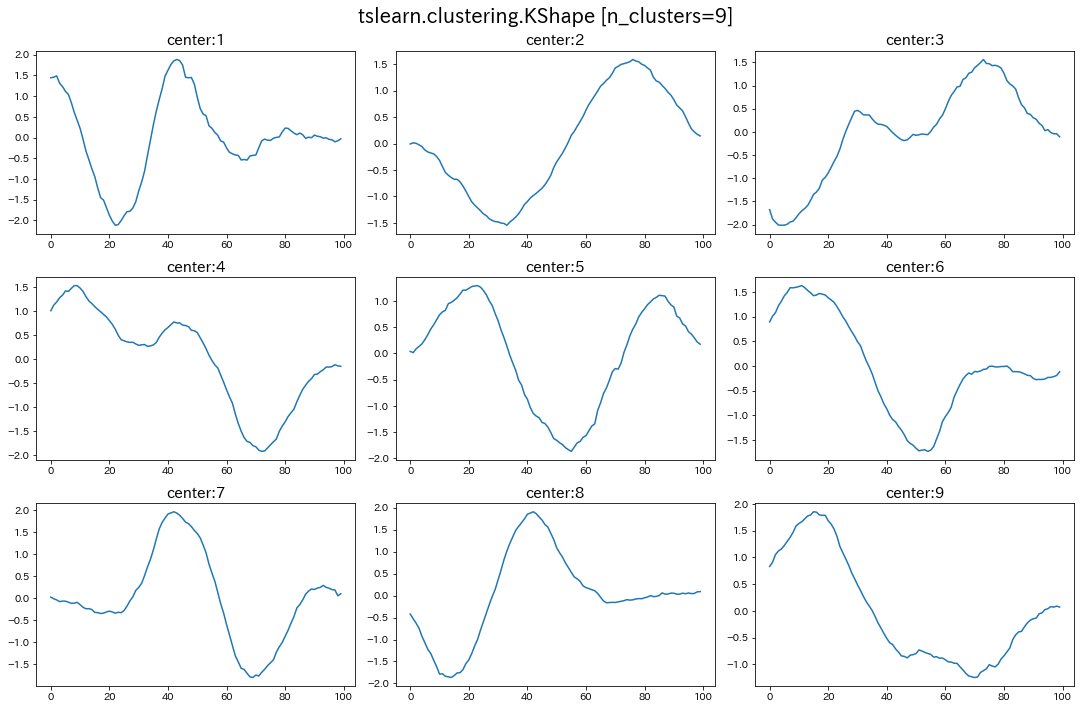

In [63]:
suptitle = 'tslearn.clustering.KShape [n_clusters=9]'
show_cluster(ks, suptitle, 'center')

## エルボー法

In [15]:
distances = []
for n in range(1, 11):
    print(f'n_clusters:{n}')
    ks = KShape(n_clusters=n)
    rs = ks.fit_predict(A)
    distances.append(ks.inertia_)

n_clusters:1


n_clusters:2
n_clusters:3
n_clusters:4
n_clusters:5
n_clusters:6
n_clusters:7
n_clusters:8
n_clusters:9
n_clusters:10


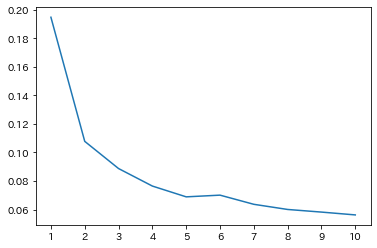

In [16]:
plt.plot(distances)
plt.xticks(range(10), range(1,11))
plt.show()

## クラスタ数:５

In [26]:
ks5 = KShape(n_clusters=5)
rs = ks5.fit_predict(A)

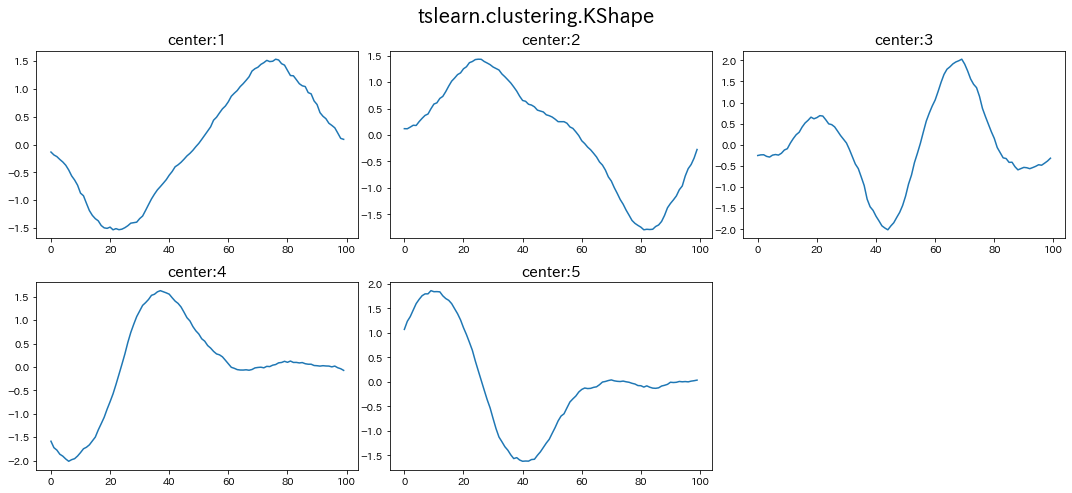

In [27]:
suptitle = 'tslearn.clustering.KShape []'
show_cluster(ks5, suptitle, 'center')

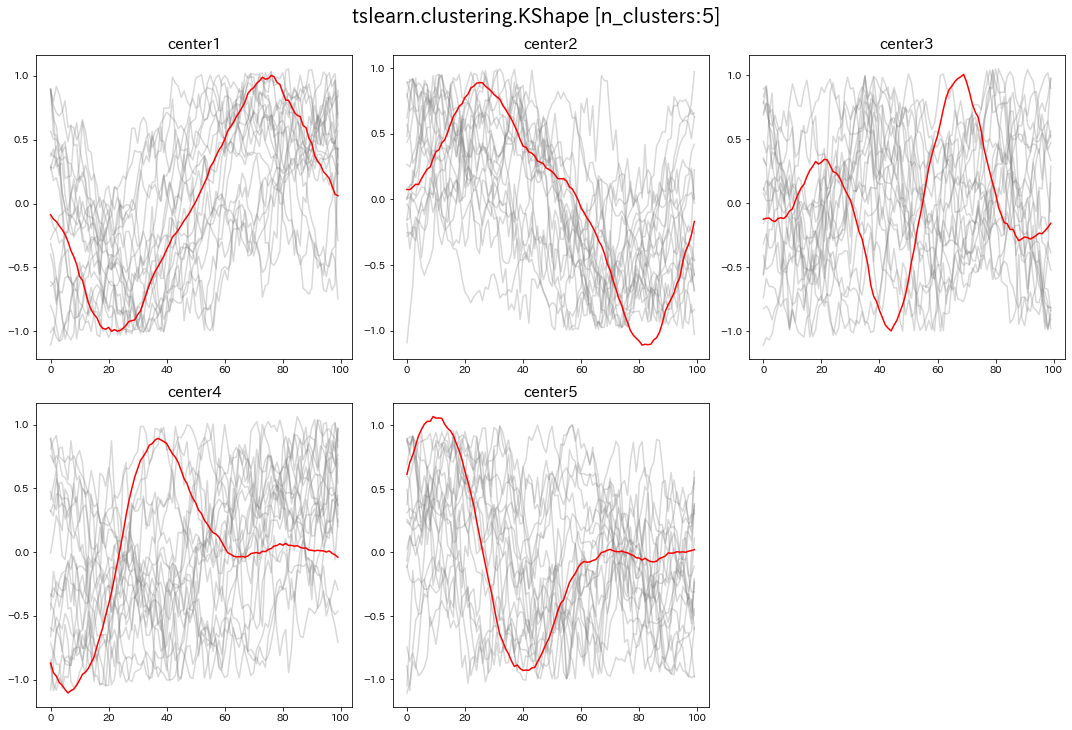

In [59]:
n_clusters = len(np.unique(ks5.labels_)) 
plt.figure(figsize=(15, 15))
plt.suptitle('tslearn.clustering.KShape [n_clusters:5]', fontsize=20)
for i in range(n_clusters):
    plt.subplot(3, 3, i+1)
    plt.title(f'center{i+1}', fontsize=15)
    for x in A[rs==i][:20]:
        plt.plot(x.ravel(), c='gray', alpha=.3)
    cluster_centers = normalize(ks5.cluster_centers_[i].ravel())
    plt.plot(cluster_centers - np.mean(cluster_centers), 'r-')
plt.tight_layout(rect=[0, 0, 1, 0.99])

## スケーリングを変更

In [53]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset
X_Train = to_time_series_dataset(scores)
X_Train = TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(X_Train)

In [54]:
ks = KShape(n_clusters=5, random_state=0)
ks.fit(X_Train)
y_pred = ks.fit_predict(X_Train)
y_pred

array([1, 2, 0, ..., 4, 4, 3])

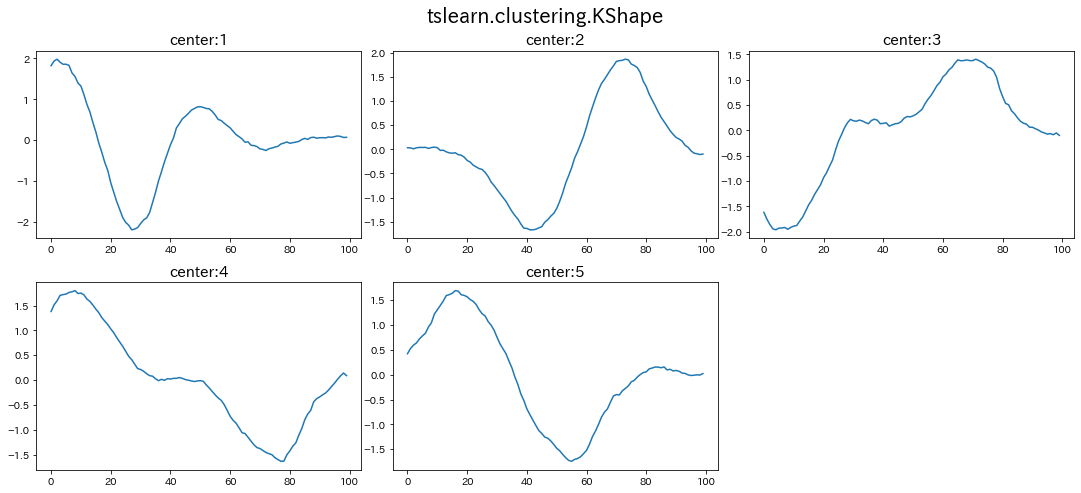

In [55]:
suptitle = 'tslearn.clustering.KShape'
show_cluster(ks, suptitle, 'center')

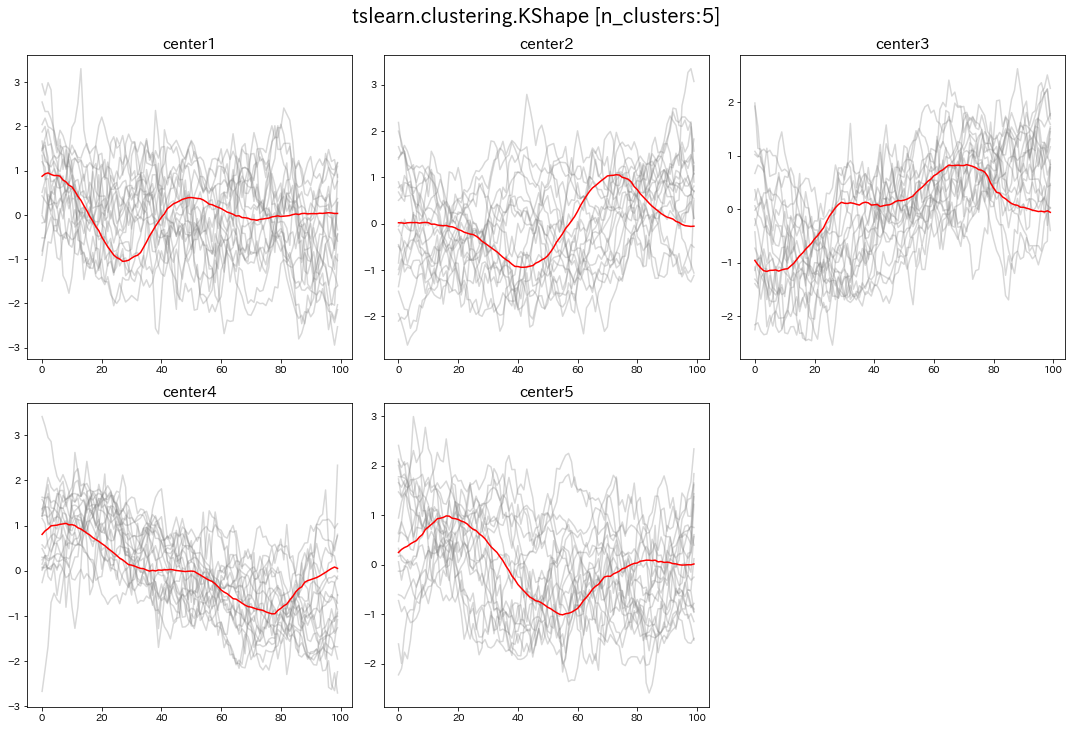

In [58]:
n_clusters = len(np.unique(ks.labels_)) 
plt.figure(figsize=(15, 15))
plt.suptitle('tslearn.clustering.KShape [n_clusters:5]', fontsize=20)
for i in range(n_clusters):
    plt.subplot(3, 3, i+1)
    plt.title(f'center{i+1}', fontsize=15)
    for x in X_Train[y_pred==i][:20]:
        plt.plot(x.ravel(), c='gray', alpha=.3)
    cluster_centers = normalize(ks.cluster_centers_[i].ravel())
    plt.plot(cluster_centers - np.mean(cluster_centers), 'r-')
plt.tight_layout(rect=[0, 0, 1, 0.99])

In [1]:
# ネットや書籍でよく紹介されているので期待したが，思ったほどではなかった